In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("temperature_data.txt")
x = data[:, 0]/24
y = data[:, 1]

In [15]:
x

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875])

In [16]:
x*24

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21.])

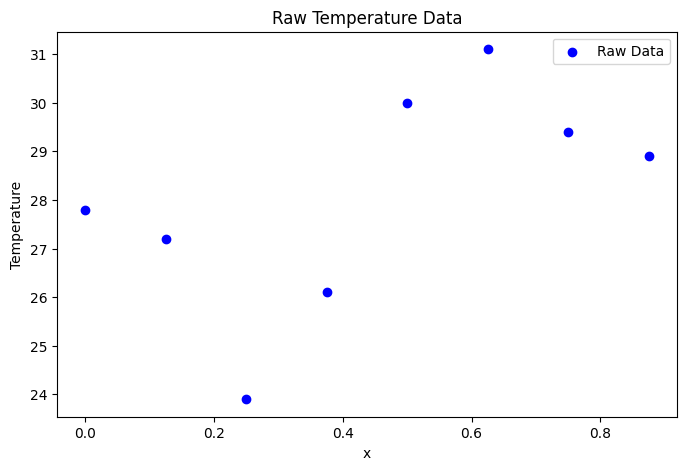

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Raw Data')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Raw Temperature Data')
plt.legend()
plt.show()

In [11]:
def simple_least_squares(x, y):
    N = len(x)
    assert N == len(y), "Input arrays must have the same length"
    # Model: y = c1 + c2 * cos(2πx) + c3 * sin(2πx)
    M = 3
    A = np.zeros((N, M))
    for i in range(N):
        A[i, 0] = 1.0
        A[i, 1] = np.cos(2 * np.pi * x[i])
        A[i, 2] = np.sin(2 * np.pi * x[i])
    b = y

    # Normal equation
    B = np.matmul(A.T, A)
    Y = np.matmul(A.T, b)
    params = np.linalg.solve(B, Y)
    return params, B, Y, A

In [12]:
params, B, Y, A = simple_least_squares(x, y)
print("Fitted parameters (c1, c2, c3):", params)

Fitted parameters (c1, c2, c3): [28.05       -0.74445436 -2.55940386]


In [13]:
A

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  7.07106781e-01],
       [ 1.00000000e+00,  6.12323400e-17,  1.00000000e+00],
       [ 1.00000000e+00, -7.07106781e-01,  7.07106781e-01],
       [ 1.00000000e+00, -1.00000000e+00,  1.22464680e-16],
       [ 1.00000000e+00, -7.07106781e-01, -7.07106781e-01],
       [ 1.00000000e+00, -1.83697020e-16, -1.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01, -7.07106781e-01]])

In [14]:
A.T

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  6.12323400e-17,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -1.83697020e-16,  7.07106781e-01],
       [ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00, -7.07106781e-01]])

In [9]:
B

array([[ 8.00000000e+00, -5.55111512e-16, -2.22044605e-16],
       [-5.55111512e-16,  4.00000000e+00,  4.54235746e-16],
       [-2.22044605e-16,  4.54235746e-16,  4.00000000e+00]])

In [10]:
Y

array([224.4       ,  -2.97781746, -10.23761543])

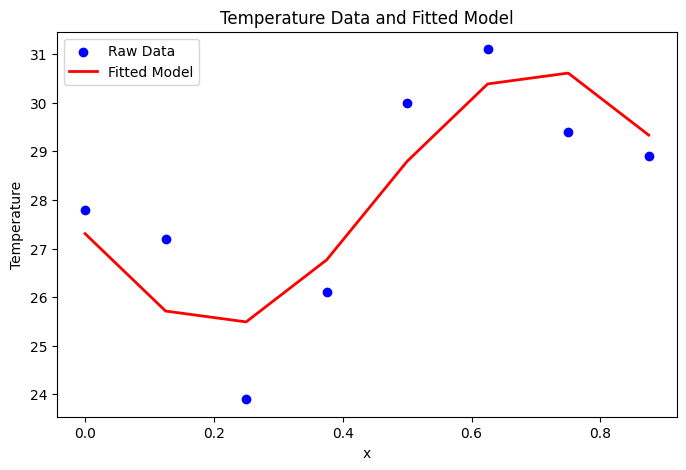

In [9]:
# Generate fitted values
y_fit = params[0] + params[1]*np.cos(2*np.pi*x) + params[2]*np.sin(2*np.pi*x)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Raw Data')
plt.plot(x, y_fit, color='red', label='Fitted Model', linewidth=2)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Temperature Data and Fitted Model')
plt.legend()
plt.show()